- Gabriel Quiroz 19255
- Jose Pablo Ponce 19092

In [115]:
#Importar las librerías

import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn import feature_extraction, tree, model_selection, metrics
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from yellowbrick.features import Rank2D
from yellowbrick.features import RadViz

## Parte 1 – Ingeniería de características


### Exploración de datos

1. Cargue el dataset en un dataframe de pandas, muestre un ejemplo de cinco observaciones.


In [116]:
## Cargar el dataset proporcionado
df = pd.read_csv('dataset_pishing.csv')
print(df.shape)
pd.set_option('display.max_columns', None)
df.sample(n=5).head() 

(11430, 67)


,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
2338,http://www.newyorkcity.ru/path-%D0%BD%D1%8C%D1...,0,1,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,41,3,2,3,2,11,11,4,2.292683,7.0,2.051282,0,0,0,0,0,0,37,0.783784,0.216216,0,1,0,0.125000,0,0.000000,0,1,72.727273,0,92.857143,7.142857,0,0,0,50.000000,0,0,0,0,0,0,227,6348,2869931,1,1,2,legitimate
3853,https://www2.k12albemarle.org/school/SMS,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0,2,0,4,4,3,4,3,12,12,6,6.250000,8.0,4.500000,0,0,0,0,0,0,125,0.856000,0.144000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,100.000000,0.000000,0,0,1,37.931034,0,0,0,1,0,0,3502,-1,255151,0,0,3,legitimate
9870,http://www.webopedia.com/TERM/C/CLI.html,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,6,3,1,3,1,9,9,4,4.000000,6.0,3.000000,0,0,0,0,0,0,164,0.640244,0.359756,0,0,0,0.135593,0,0.644068,0,1,30.952381,0,100.000000,0.000000,0,0,0,80.000000,0,0,0,0,0,0,617,8147,12601,0,0,6,legitimate
2309,https://persediaan.jogjaprov.go.id/wp-wp/Owa/i...,0,0,0,0,0,0,0,0,0,0,3,1,1,0,0,0,0,8,2,2,9,2,10,10,5,4.625000,9.5,3.000000,2,0,0,0,1,0,20,0.150000,0.850000,0,2,0,0.000000,0,0.000000,0,1,0.000000,0,100.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,545,4914,58891,0,1,4,phishing
3001,https://www.encyclopediaofmath.org/index.php/C...,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,2,0,6,4,3,3,3,18,18,9,7.166667,10.5,5.500000,0,0,0,0,0,0,57,0.964912,0.035088,0,0,0,1.000000,0,0.000000,0,0,100.000000,0,100.000000,0.000000,0,0,0,66.666667,0,0,0,1,0,0,615,3403,189734,0,1,5,legitimate


2. Muestre la cantidad de observaciones etiquetadas en la columna status como “legit” y como
“pishing”. ¿Está balanceado el dataset?

In [117]:
print('legitimate:', len(df[df['status']=='legitimate']))
print('phising:', len(df[df['status']=='phishing']))

legitimate: 5715
phising: 5715


Como se puede observar hay la misma cantidad de observaciones tanto para "legitimate" y "phising", por ende se puede afirmar que el dataset esta balanceado

### Derivación de características


En base al artículo “Towards Benchmark Datasets for ML Based Wensite Phishing Detection: An
Experimental Study”, derivar las características basadas en el dominio: f1, f2, f4 – f20, f25, f26 y f27.

In [118]:
from urllib.parse import urlparse
def get_hostname(url):
    o = urlparse(url)
    return o.hostname
    
df['hostname'] = df['url'].apply(get_hostname)


In [119]:
#f1
df['f1'] = df['url'].str.len()


In [120]:

#f2
df['f2'] = df['hostname'].str.len()


In [121]:
#f4
df['f4'] = df['url'].str.count('\\.')

#f5
df['f5'] = df['url'].str.count('\\-')

#f6
df['f6'] = df['url'].str.count('\\@')

#f7
df['f7'] = df['url'].str.count('\\?')

#f8
df['f8'] = df['url'].str.count('\\&')

#f9
df['f9'] = df['url'].str.count('\\|')

#f10
df['f10'] = df['url'].str.count('\\=')

#f11
df['f11'] = df['url'].str.count('\\_')

#f12
df['f12'] = df['url'].str.count('\\˜')

#f13
df['f13'] = df['url'].str.count('\\%')

#f14
df['f14'] = df['url'].str.count('\\/')

#f15
df['f15'] = df['url'].str.count('\\*')

#f16
df['f16'] = df['url'].str.count('\\:')

#f17
df['f17'] = df['url'].str.count('\\,')

#f18
df['f18'] = df['url'].str.count('\\;')

#f19
df['f19'] = df['url'].str.count('\\$')

#f20
df['f20'] = df['url'].str.count('\\%20')


In [122]:
#f25
df['f25'] = df['url'].str.startswith('https')
df["f25"] = df["f25"].astype(int)


In [123]:
#f26
def count_digits(url):
    digits = sum(c.isdigit() for c in url)
    url_len = len(url)
    return digits / url_len

df["f26"] = df["url"].apply(count_digits)

In [124]:
#f27
df["f27"] = df["hostname"].apply(count_digits)

In [125]:
df.sample(n=5).head() 

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,hostname,f1,f2,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f25,f26,f27
9284,http://setuprouter.com/router/tp-link/tl-wr740...,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,9,0,2,11,2,11,11,6,4.777778,11.000000,4.000000,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000,0,0.000000,0,0,0.000000,0,0.0,0.0,0,0,0,0.000000,0,0,1,1,1,0,935,5273,41333,0,0,4,legitimate,setuprouter.com,62,15,2,3,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,0.096774,0.000000
7986,https://www.johnsansom.com/the-database-admini...,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,7,3,3,3,3,14,10,14,8.428571,6.500000,9.200000,1,0,0,0,0,0,36,0.333333,0.666667,0,0,0,0.125,0,0.083333,0,1,77.777778,0,0.0,100.0,0,0,0,23.076923,0,0,0,1,1,0,173,4209,4303407,0,0,4,legitimate,www.johnsansom.com,78,18,2,4,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0.000000,0.000000
10605,http://www.gov.hmrc.secure-tax-rebate.uk/,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,6,3,3,3,0,6,6,0,4.166667,4.166667,0.000000,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000,0,0.000000,0,0,0.000000,0,0.0,0.0,0,0,0,0.000000,0,0,1,1,0,1,0,49,0,0,1,0,phishing,www.gov.hmrc.secure-tax-rebate.uk,41,33,4,2,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0.000000,0.000000
6293,http://back.dog/auth/login,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,3,0,4,4,4,5,4,5,4.333333,4.000000,4.500000,1,0,0,0,0,0,33,0.909091,0.090909,0,1,0,0.000,0,0.000000,0,1,88.888889,0,0.0,0.0,0,0,0,100.000000,0,0,0,0,0,1,0,-1,1782754,0,1,1,legitimate,back.dog,26,8,1,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0.000000,0.000000
2723,http://13suntrust4.7m.pl/clen/bnk/vct/dsk/SunT...,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,2,0,9,0,2,2,3,11,11,8,4.777778,6.500000,4.285714,0,0,0,0,0,0,12,1.000000,0.000000,0,0,0,0.000,0,0.000000,0,0,100.000000,0,100.0,0.0,0,0,0,0.000000,0,0,0,1,1,0,146,-1,352415,0,1,2,phishing,13suntrust4.7m.pl,61,17,3,0,0,0,0,0,0,0,0,0,8,0,1,0,0,0,0,0,0.065574,0.235294


### Preprocesamiento

Realice las modificaciones necesarias para convertir la variable categórica status a una variable
binaria. Elimine la columna del dominio.

In [126]:
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})


In [127]:
df = df.drop(['hostname', 'url'], axis=1)

### Visualización de resultados


Genere un reporte de perfil con la librería pandas_profiling. Analice el reporte y determine las
columnas que son constantes, o que no tienen una varianza alta con la columna status. Almacene su
reporte como una página html.

# Falta analisis ------------------------

In [41]:
#from pandas_profiling import ProfileReport

Summarize dataset: 100%|█████████▉| 1859/1865 [06:23<00:01,  4.79it/s, Missing diagram bar]                                           c:\Users\joopa\AppData\Local\Programs\Python\Python39\lib\site-packages\missingno\missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
c:\Users\joopa\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas_profiling\model\missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (88).')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:

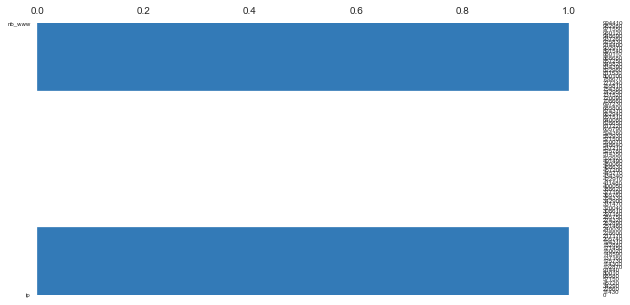

In [42]:
#prof = ProfileReport(df)
#prof.to_file(output_file='reporte.html')

### Selección de Características


En base al análisis del reporte, elimine las características repetidas o irrelevantes para la clasificación
de un sitio de pishing. Verifique que no posee observaciones repetidas.

# mira que podes eliminar que sea irrelevante ------------------------

In [128]:
df = df.drop(['domain_registration_length', 'sfh', 'submit_email', 'ratio_extErrors', 'ratio_intErrors','ratio_extRedirection', 'ratio_intRedirection', 'ratio_nullHyperlinks', 'nb_redirection', 'f9', 'f12', ], axis=1)

In [129]:
print('Duplicados antes de limpieza', df.duplicated().sum())
df = df.drop_duplicates()
print('Duplicados luego de limpieza', df.duplicated().sum())


Duplicados antes de limpieza 204
Duplicados luego de limpieza 0


## Parte 2 – Implementación


### Separación de datos


- Datos de entrenamiento: 55%
- Datos de validación: 15%
- Datos de prueba: 30%
- Almacene cada dataset como un archivo .csv